In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [8]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [10]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [11]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [33]:
features_cols = ["Monthly Income", "Transaction Time",
                  "Gender_Female", "Gender_Male", "City_Tier 1",
                    "City_Tier 2", "City_Tier 3",
                    "Record"]


In [34]:
X = df_new[features_cols]
Y = df_new["Total Spend"]

In [35]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [36]:
lm.intercept_, lm.coef_

(-79.41713030136725,
 array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
         7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02]))

In [37]:
list(zip(features_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589615),
 ('Gender_Female', -131.0250132555454),
 ('Gender_Male', 131.0250132555453),
 ('City_Tier 1', 76.76432601049501),
 ('City_Tier 2', 55.13897430923254),
 ('City_Tier 3', -131.90330031972766),
 ('Record', 772.2334457445633)]

In [38]:
lm.score(X, Y)

0.9179923586131016

El modelo puede ser escrito como:

Total_spend = -79.41713030136725 + 'Monthly Income' * 0.14753898049205744 + 'Transaction Time'* 0.15494612549589615 + 'Gender_Female'*-131.0250132555454  + 'Gender_Male' * 131.0250132555453 + 'City_Tier 1' * 76.76432601049501 + 'City_Tier 2' * 55.13897430923254 + 'City_Tier 3' * -131.90330031972766 + 'Record' * 772.2334457445633

* Si es hombre y vive en CT1: Total_spend = -79.41713030136725 + 'Monthly Income' * 0.14753898049205744 + 'Transaction Time'* 0.15494612549589615 + 131.0250132555453 + 76.76432601049501 + 'Record' * 772.2334457445633
* Si es hombre y vive en CT2: Total_spend  = -79.41713030136725 + 'Monthly Income' * 0.14753898049205744 + 'Transaction Time'* 0.15494612549589615 + 131.0250132555453 + 55.13897430923254 + 'Record' * 772.2334457445633
* Si es hombre y vive en CT3: Total_spend  = -79.41713030136725 + 'Monthly Income' * 0.14753898049205744 + 'Transaction Time'* 0.15494612549589615 + 131.0250132555453 -131.90330031972766 + 'Record' * 772.2334457445633
* Si es mujer y vive en CT1: Total_spend = -79.41713030136725 + 'Monthly Income' * 0.14753898049205744 + 'Transaction Time'* 0.15494612549589615 - 131.0250132555453 + 76.76432601049501 + 'Record' * 772.2334457445633
* Si es mujer y vive en CT2: Total_spend = -79.41713030136725 + 'Monthly Income' * 0.14753898049205744 + 'Transaction Time'* 0.15494612549589615 - 131.0250132555453 + 55.13897430923254 + 'Record' * 772.2334457445633
* Si es mujer y vive en CT3: Total_spend = -79.41713030136725 + 'Monthly Income' * 0.14753898049205744 + 'Transaction Time'* 0.15494612549589615 - 131.0250132555453 -131.90330031972766 + 'Record' * 772.2334457445633

In [39]:
df_new["prediction"] = -79.41713030136725 + df_new['Monthly Income'] * 0.14753898049205744 + df_new['Transaction Time']* 0.15494612549589615 + df_new['Gender_Female']*-131.0250132555454  + df_new['Gender_Male'] * 131.0250132555453 + df_new['City_Tier 1'] * 76.76432601049501 + df_new['City_Tier 2'] * 55.13897430923254 + df_new['City_Tier 3'] * -131.90330031972766 + df_new['Record'] * 772.2334457445633

# Otra forma df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [40]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [41]:
SSD = np.sum((df_new["prediction"]-df_new["Total Spend"])**2)
SSD

1517733985.3408165

In [42]:
RSE = np.sqrt(SSD/(len(df_new)-len(features_cols)-1))
RSE

803.1318809818166

In [47]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976715

In [48]:
RSE/sales_mean

0.1303113568029416

## Eliminar variables dummy redundantes

In [105]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender").iloc[:,1:]

In [106]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [107]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City").iloc[:, 1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [110]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [113]:
features_cols = ["Monthly Income", "Transaction Time", "Gender_Male",
                 "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[features_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [114]:
lm.intercept_

-133.67781754642238

In [115]:
list(zip(features_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589615),
 ('Gender_Male', 262.0500265110957),
 ('City_Tier 2', -21.62535170126293),
 ('City_Tier 3', -208.66762633022313),
 ('Record', 772.2334457445637)]

In [116]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo

* ('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589615),
* ('Gender_Female', -131.0250132555454),
* ('Gender_Male', 131.0250132555453),
* ('City_Tier 1', 76.76432601049501),
* ('City_Tier 2', 55.13897430923254),
* ('City_Tier 3', -131.90330031972766),
* ('Record', 772.2334457445633)]

 Coeficientes tras enmascaras la variables dummy pertinentes

* ('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589615),
* ('Gender_Male', 262.0500265110957),
* ('City_Tier 2', -21.62535170126293),
* ('City_Tier 3', -208.66762633022313),
* ('Record', 772.2334457445637)

Los cambios se reflejan en 
* Gender_Male: 
    * antes -> 131.0250132555453
    * después 262.0500265110957 = (131.0250132555453-(-131.0250132555454))
* Gender_Female: 
    * antes -> -131.0250132555454
    * después -> 0
* CT1: 
    * antes -> 76.76432601049501 
    * después -> 0
* CT2: 
    * antes -> 55.13897430923254 
    * después -> -21.62535170126293 = (55.13897430923254-76.76432601049501)
* CT3: 
    * antes -> -131.90330031972766 
    * después -> -208.66762633022313 = (-131.90330031972766 - 76.76432601049501)

# Transformación de variables para conseguir una relación no lineal
Se recomienda hacer un scatter plot de la salida con todas las variables predictoras (matriz de scatter plot).
Si el scatter asume que mas o menos es lineal -> se puede concluir de que se trata de una variable que está linea de forma lineal a la predicción.
Si el scatter plot da una forma característica que no tiene pinta de ser lineal para alguna de las variables predictoras, entonces será necesario transformar dicha variable en particular antes de poder aplicarle la función.

In [49]:
import pandas as pd

In [50]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [51]:
data_auto.shape

(406, 9)

In [52]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

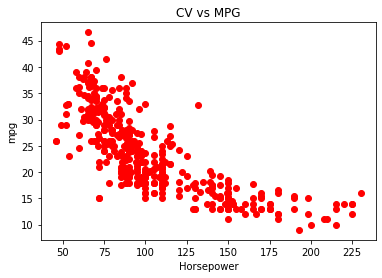

In [53]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Horsepower")
plt.ylabel("mpg")
plt.title("CV vs MPG")

### Modelo de regresión lineal
* mpg = alpha + beta * horsepower

In [89]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean()).values.reshape(-1,1)
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean()).values.reshape(-1,1)

In [57]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

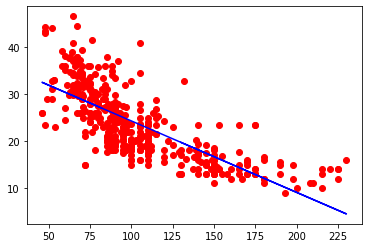

In [59]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X,lm.predict(X), color = "blue")

In [61]:
lm.score(X,Y)

0.5746533406450252

In [63]:
SSD = np.sum((Y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-2))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(10315.751960060918,
 5.053121758388698,
 23.514572864321607,
 0.21489319782864275)

### Modelo de regresión cuadrático
* mpg = alpha + beta * horsepower^2

In [65]:
X = X**2


In [67]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [69]:
lm.score(X,Y)

0.4849887034823205

In [70]:
SSD = np.sum((Y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-2))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(12490.350340501926,
 5.5602795580454965,
 23.514572864321607,
 0.23646100612280502)

### Modelo de regresión lineal y cuadrático
* mpg = alpha + beta * horsepower + c * horsepower^2

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [78]:
poly = PolynomialFeatures(degree=2)

In [84]:
X = poly.fit_transform(X)

In [85]:
lm = linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [86]:
lm.score(X, Y)

0.6439066584257469

In [87]:
lm.intercept_, lm.coef_

(array([55.02619245]), array([[ 0.        , -0.43404318,  0.00112615]]))

mpg = 55.02619245 - 0.434*hp + 0.00112615*hp^2

In [104]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X)
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print("Regresion de grado " + str(d))
    print(lm.score(X_data,Y))
    print(lm.intercept_)
    print(lm.coef_)
    regression_validation(lm,X_data, Y)

Regresion de grado 2
0.6439066584257469
[55.02619245]
[[ 0.         -0.43404318  0.00112615]]
SSD: 8636.180643524502, RSE: 4.623492701540607, y_mean: 23.514572864321607, error: 19.662244039974798 %
Regresion de grado 3
0.6444678885560744
[58.44877411]
[[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]]
SSD: 8622.56936742855, RSE: 4.6198477771171245, y_mean: 23.514572864321607, error: 19.64674333560516 %
Regresion de grado 4
0.6467674189704502
[40.09664386]
[[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
  -9.15840093e-08]]
SSD: 8566.799832491351, RSE: 4.604883286297725, y_mean: 23.514572864321607, error: 19.583104115340586 %
Regresion de grado 5
0.6547512491363356
[-40.69402904]
[[ 0.00000000e+00  4.00021893e+00 -7.54802467e-02  6.19621640e-04
  -2.36220984e-06  3.41983153e-09]]
SSD: 8373.171388794579, RSE: 4.552545634526031, y_mean: 23.514572864321607, error: 19.360528727415485 %


In [102]:
def regression_validation(lm, X, Y):
    SSD = np.sum((Y-lm.predict(X))**2)
    RSE = np.sqrt(SSD/(len(X)-2))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+ str(SSD) + ", RSE: " + str(RSE) + ", y_mean: " + str(y_mean) + ", error: " + str(error*100) + " %")
    

# El problema de los outliers
No importa tanto la cantidad de puntos outliers que haya, sino el grado en que distorsionan o influye en el promedio de grado de distorsión.

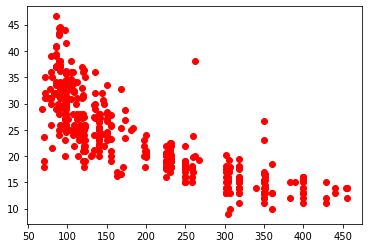

In [118]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [126]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean()).values.reshape(-1,1)

Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [131]:
lm.score(X,Y)

0.6261049762826918

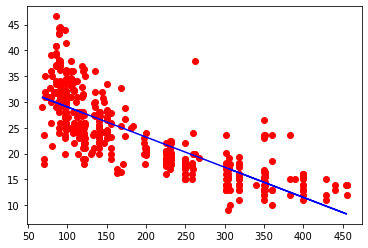

In [128]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X,lm.predict(X), "b")

In [135]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [136]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [137]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean()).values.reshape(-1,1)

Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [138]:
lm.score(X,Y)

0.6466514317531822

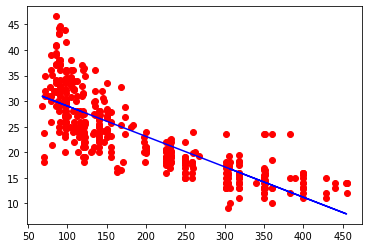

In [139]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X,lm.predict(X), "b")